In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 显示混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
# 显示模型评估结果
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision: {:.3f}'.format(tp/(tp+fp)))
    print('Recall: {:.3f}'.format(tp/(tp+fn)))
    print('F1_score: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

In [4]:
# 显示精确率-召回率曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('准确率')
    plt.title('准确率-召回率 曲线')
    plt.show();

In [5]:
# 数据加载,原始数据下载：https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv('creditcard.csv')

In [6]:
# 数据探索
print(data.describe())

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e

In [7]:
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']

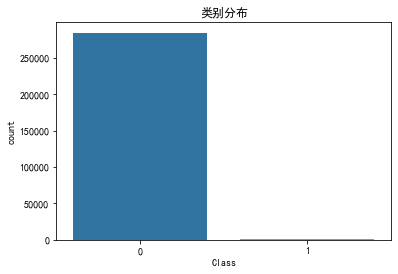

In [8]:
# 绘制类别分布
plt.figure()
ax = sns.countplot(x='Class', data=data)
plt.title('类别分布')
plt.show()

In [9]:
# 显示交易笔数,欺诈交易笔数
num = len(data)
num_fraud = len(data[data['Class']==1])
print('总交易笔数: ', num)
print('诈骗交易笔数: ', num_fraud)
print('诈骗交易比例: {:.6f}'.format(num_fraud/num))

总交易笔数:  284807
诈骗交易笔数:  492
诈骗交易比例: 0.001727


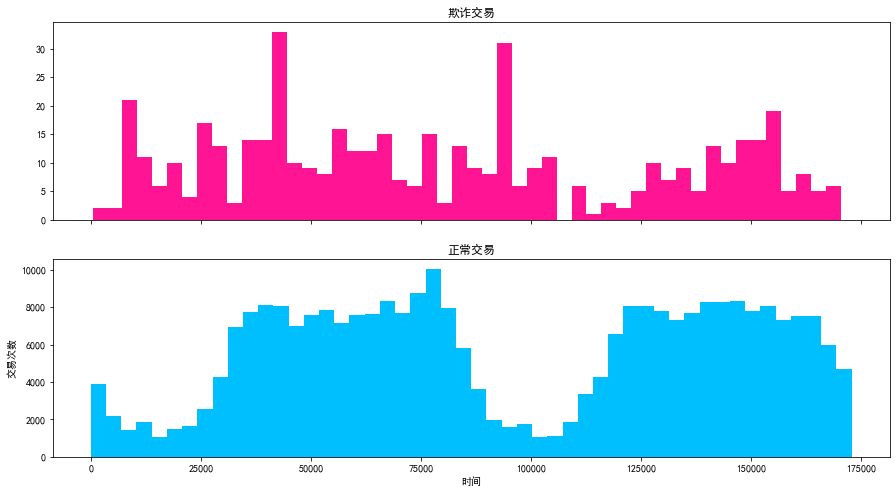

In [10]:
# 欺诈和正常交易可视化
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
bins = 50
ax1.hist(data.Time[data.Class == 1], bins=bins, color='deeppink')
ax1.set_title('欺诈交易')
ax2.hist(data.Time[data.Class == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

In [11]:
# 对Amount进行数据规范化
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# 特征选择
y = np.array(data.Class.tolist())
data = data.drop(['Time','Amount','Class'], axis=1)
X = np.array(data.as_matrix())
# 准备训练集和测试集
train_x, test_x, train_y, test_y = train_test_split (X, y, test_size = 0.1, random_state = 33)

In [12]:
# 逻辑回归分类
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

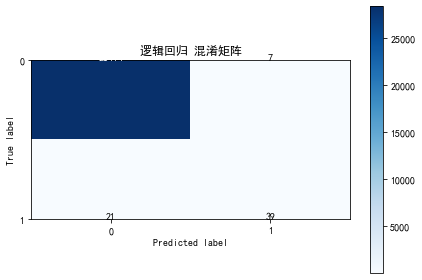

In [13]:
# 设置样本的置信分数
y_score = clf.decision_function(test_x)
# 计算混淆矩阵, 并显示
cm = confusion_matrix(test_y, predict_y)
class_names = [0,1]
# 显示混淆矩阵
plot_confusion_matrix(cm, classes=class_names, title='逻辑回归 混淆矩阵')

Precision: 0.848
Recall: 0.650
F1_score: 0.736


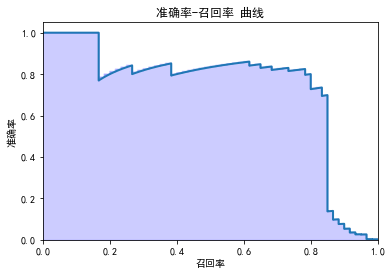

In [14]:
# 显示模型评估分数
show_metrics()
# 计算准确率，召回率，阈值用于可视化
precision, recall, thresholds = precision_recall_curve(test_y, y_score)
plot_precision_recall()

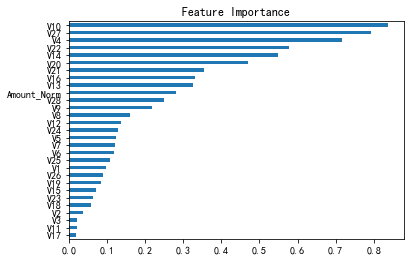

In [15]:
# 显示模型中特征重要性
coeffs = clf.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)), columns=["coef_"])
# 下标设置为Feature Name
df_co.index = data.columns
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()